# Using Data to Analyze Data Science

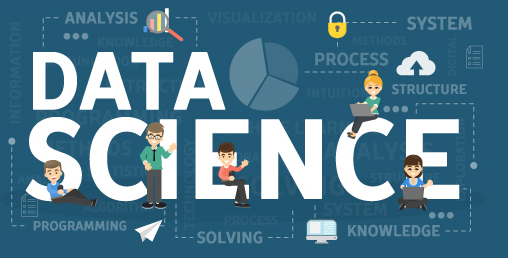


**Data Science, a word that you must have come across many times, refers to deriving meaning out of data by combining statistical and mathematical concepts. It's a buzzword that is going around and everyone tends to try it out at least once when they are starting with their development journey.**

**In this notebook, we have a look at the global data science trends like the most popular words related to data science that are searched, locations where they were searched, what were the most common queries? etc based on three different categories, i.e News Search, YouTube Search, and Web Search.**

**I have used Bokeh to make the bar plots and line charts etc and Folium has been used for plotting out data on the map to get a clearer picture. Throughout this notebook, you will have many instances that will take you back to your initial days in the data science journey.**

**Do Upvote the notebook if you liked it!**

# Importing the Libraries

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Bokeh Setup

In [ ]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import curdoc
from bokeh.models import HBar, Plot
# curdoc().theme = 'dark_minimal'
curdoc().theme = 'caliber'

output_notebook()

Before we move ahead and have a look at the three levels, we will always be having a look at the following parameters:

* Time -> The number of searches spread across the given duration

* Region -> Number of Searches made in different regions

* Topic -> What were the different topics searched by the user.

* Queries -> What different queries did people have?

# Web Search

## Time

In [ ]:
web_time = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/WebSearch_InterestOverTime.csv')
web_time.head()

**We will have to change the column name to the one present in the first row**

In [ ]:
web_time.columns = web_time.iloc[0]
web_time = web_time.reset_index()
web_time.rename(columns = {'index': 'Month', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (Worldwide)': 'Total'}, inplace=True)
web_time.drop(0, axis = 0, inplace = True)
web_time.head()

In [ ]:
web_time['Total'] = pd.to_numeric(web_time['Total'])
web_time['Year'] = pd.DatetimeIndex(web_time['Month']).year
web_time.head() 

In [ ]:
def trend(df):
    """
    A function that will plot the trend for the given years
    """
    
    cols = [int(i) for i in df['Year']]
    vals = df['Total'].to_list()
    source = ColumnDataSource(data = dict(cols = cols, counts = vals))
    p = figure(plot_height = 400, plot_width = 800, 
               x_axis_label = 'Years', y_axis_label = 'Count')
    
    # add a line renderer with legend and line thickness
    p.line('cols', 'counts', line_width = 2, source = source, line_dash = "dashed")
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font_style = 'bold'
    p.title.text_font = 'Serif'
    p.xaxis.axis_label_text_font_size = "16pt"
    p.yaxis.axis_label_text_font_size = "16pt"

    # show the results
    show(p)

In [ ]:
trend(web_time)

**From the above graph, we can observe that there has been a constant increase in the number of searches over a while. We have often heard 'Data Science' has been the buzzword for a long period, the above graph certainly proves this.**

## Region

In [ ]:
web_region = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/WebSearch_InterestByRegion.csv')
web_region.head()

In [ ]:
web_region.columns = web_region.iloc[0]
web_region = web_region.reset_index()
web_region.rename(columns = {'index': 'Country', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (1/1/10 - 4/18/21)': 'Total'}, inplace=True)
web_region.drop(0, axis = 0, inplace = True)
web_region.head()

In [ ]:
web_region["Total"] = pd.to_numeric(web_region["Total"]) # Chaning the data type from string to integer.

**We will be using Folium for dealing with maps. Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.**

In [ ]:
import folium
import json
world_geojson = json.load(open('/kaggle/input/world1/world-countries.json'))

## The json file is neccessary for the choropleth, as it contains coordinate information about each country.

In [ ]:
def mapping(df, world_geojson, indices_to_drop = False):
    """
    A function that enables you to view the cases distribution on a world map
    """
    
    df1 = df[['Country', 'Total']]
    df1['Total'] = df1['Total'].fillna(0) # Replacing null values with 0
    if indices_to_drop:
        df1 = df1.drop(indices_to_drop, axis = 0) # Removing them because they had values <1 which causes problems while mapping.
    df1["Total"] = pd.to_numeric(df1["Total"])
    
    m = folium.Map(tiles = "cartodbpositron")
    
    folium.Choropleth(
        geo_data = world_geojson,
        data = df1,
        columns = ['Country', 'Total'],
        key_on = 'feature.properties.name',
        fill_color="YlOrRd",
        fill_opacity = 0.7, 
        line_opacity = 0.2,
    ).add_to(m)

    m
    
    return m

In [ ]:
mapping(web_region, world_geojson)

**China and India are the countries where the web searches are made the most!**

## Topics

In [ ]:
web_topics = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/WebSearch_RelatedTopics.csv', skiprows = 4, names = ['Topic', 'Number of Searches'])

In [ ]:
web_topics.head()

There is a unique kind of value for 'Number of Searches' column, breakout means extremely popular, therefore let's see the topics that broke out.

In [ ]:
web_topics[web_topics['Number of Searches'] == 'Breakout']['Topic'].unique()

After looking at the above terms, a smile came to my face. It's because these are the words that we as data scientists must have searched at some point of our career, I mean I still do. For example:

* If I want to read about Big Data I would search 'Big Data' a lot of times on Google.

* If I want to learn AWS or read its docs, I would search Amazon Web Services.

* If I want to learn about something new I would go to Coursera or Udemy. 

Therefore, these above terms are pretty popular and are regularly searched.

Let's look at the words that have some count associated with it.

In [ ]:
df = web_topics[web_topics['Number of Searches'] != 'Breakout']
df['Number of Searches'] = pd.to_numeric(df['Number of Searches'])
df_sort = df.sort_values(by = 'Number of Searches', ascending = False).head(10)
df_sort.head()

In [ ]:
topics = df_sort['Topic'].to_list()[:10]
counts = df_sort['Number of Searches'].to_list()[:10]
source = ColumnDataSource(data = dict(topics = topics, counts = counts, color = ['teal'] * 10))

p = figure(x_range = topics, plot_height = 400, plot_width = 800, title = "Most Popular Topics", tools = "hover", tooltips = "@topics: @counts", background_fill_color="#f4f0ec")
p.vbar(x = 'topics', top = 'counts', width = 0.9, source = source, color = 'color')

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font_style = 'bold'
p.title.text_font = 'Serif'
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
    
show(p)

**From the above graph, we can observe that words like 'Machine Learning', 'Data', 'Data Science' were searched most often. These are certain words that a lot of people tend to search the most number of times. Imagine you as a beginner and starting to learn AI, first I will go and read about 'Machine Learning', while reading Machine Learning, I will come across 'Deep Learning' and then I will search for that. Then I may across 'Python' as a programming language for doing ML/AI, then I will search and read about Python. So all these searches make a lot of sense.**

## Queries

In [ ]:
web_queries = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/WebSearch_RelatedQueries.csv', skiprows = 4, names = ['Query', 'Number of Searches'])
web_queries.head()

**Again there are some breakout queries, let's have a look at them!**

In [ ]:
web_queries[web_queries['Number of Searches'] == 'Breakout']['Query'].unique()

**These are again very similar queries, I can see many queries that I have also searched a lot of times :), like Python for ML, kaggle, r for ML, Azure ML, TensorFlow, etc. I am sure you also have searched queries a lot of times.**

In [ ]:
def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus) ## Shape: (2045, 46774) -> There are 2045 sentences and 46774 words
    sum_words = bag_of_words.sum(axis=0) ## Shape: (1, 46774) -> Count of occurance of each word
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] ## vec.vocabulary_.items returns the dictionary with (word, index)
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]

def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

In [ ]:
def unigram_plot(unigram, color):
    """
    A function used to plot bar charts for top unigrams
    """
    words = [i[0] for i in unigram]
    count = [i[1] for i in unigram]
    source = ColumnDataSource(data = dict(Word = words, counts = count, color = [color] * 10))

    p = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Unigram", tools = "hover", tooltips = "@Word: @counts", background_fill_color="#f4f0ec")
    p.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
    p.title.align = 'center'
    p.xaxis.major_label_orientation = "horizontal"

    p.xgrid.grid_line_color = None
    p.legend.orientation = "horizontal"
    p.legend.location = "top_right"

    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font_style = 'bold'
    p.title.text_font = 'Serif'
    p.xaxis.axis_label_text_font_size = "16pt"
    p.yaxis.axis_label_text_font_size = "16pt"
    
    return p

In [ ]:
def bigram_plot(bigram, color, color_length):
    """
    A function used to plot bar charts for top bigrams
    """
    words = [i[0] for i in bigram]
    count = [i[1] for i in bigram]
    source = ColumnDataSource(data = dict(Word = words, counts = count, color = [color] * color_length))

    p = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Bigrams", tools = "hover", tooltips = "@Word: @counts", background_fill_color="#f4f0ec")
    p.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
    p.xgrid.grid_line_color = None
    p.xaxis.major_label_orientation = "vertical"
    p.legend.orientation = "horizontal"
    p.legend.location = "top_right"

    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font_style = 'bold'
    p.title.text_font = 'Serif'
    p.xaxis.axis_label_text_font_size = "16pt"
    p.yaxis.axis_label_text_font_size = "16pt"

    return p

In [ ]:
top_unigram = get_top_n_words(web_queries['Query'], 10)
show(unigram_plot(top_unigram, '#6baed6'))

In [ ]:
top_bigram = get_top_n_bigram(web_queries['Query'], 10)
show(bigram_plot(top_bigram, '#a1dab4', 10))

# Youtube Search

## Time

In [ ]:
youtube_time = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/YoutubeSearch_InterestOverTime.csv')
youtube_time.head()

In [ ]:
youtube_time.columns = youtube_time.iloc[0]
youtube_time = youtube_time.reset_index()
youtube_time.rename(columns = {'index': 'Month', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (Worldwide)': 'Total'}, inplace=True)
youtube_time.drop(0, axis = 0, inplace = True)
youtube_time.head()

In [ ]:
youtube_time['Total'] = pd.to_numeric(youtube_time['Total'])
youtube_time['Year'] = pd.DatetimeIndex(youtube_time['Month']).year
youtube_time.head() 

In [ ]:
trend(youtube_time)

**From the above graph, we can observe that there has been a constant increase in the number of searches on Youtube from 2010 to 2016 then it dropped for one month, then again it started rising till 2020.**

## Topics

In [ ]:
youtube_topics = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/YoutubeSearchRelatedTopics.csv', skiprows = 4, names = ['Topic', 'Number of Searches'])
youtube_topics.head()

In [ ]:
youtube_topics[youtube_topics['Number of Searches'] == 'Breakout']['Topic'].unique()

**Woah, I see Andrew Ng's name there :). He is truly the best in this field. Next, we can also see the Massachusetts Institute of Technology, it might be due to its great ML course that is available on Youtube. We can also see words like Neuron, ANN, etc. Oh God, these words are taking me back to my initial days!**

In [ ]:
df = youtube_topics[youtube_topics['Number of Searches'] != 'Breakout']
df['Number of Searches'] = pd.to_numeric(df['Number of Searches'])
df_sort = df.sort_values(by = 'Number of Searches', ascending = False).head(10)
df_sort.head()

In [ ]:
topics = df_sort['Topic'].to_list()[:10]
counts = df_sort['Number of Searches'].to_list()[:10]
source = ColumnDataSource(data = dict(topics = topics, counts = counts, color = ['lightseagreen'] * 10))

p = figure(x_range = topics, plot_height = 400, plot_width = 800, title = "Most Popular Topics", tools = "hover", tooltips = "@topics: @counts", background_fill_color="#f4f0ec")
p.vbar(x = 'topics', top = 'counts', width = 0.9, source = source, color = 'color')

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = "vertical"
p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font_style = 'bold'
p.title.text_font = 'Serif'
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
    
show(p)

## Queries

In [ ]:
youtube_queries = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/YoutubeSearchRelatedQueries.csv', skiprows = 4, names = ['Query', 'Number of Searches'])
youtube_queries.head()

In [ ]:
youtube_queries[youtube_queries['Number of Searches'] == 'Breakout']['Query'].to_list()

* Most of the people have queried about Machine Learning tutorials, data science tutorials, and machine learning in python.

* People also queried about machine learning projects which I have also searched quite often.

* It's nice that terms like Statistics are being queried to get to know the core concepts.

**It would be fun to analyze the top channels that people follow for learning such topics.**

In [ ]:
top_unigram = get_top_n_words(youtube_queries['Query'], 10)
show(unigram_plot(top_unigram, 'salmon'))

In [ ]:
top_bigram = get_top_n_bigram(youtube_queries['Query'], 10)
show(bigram_plot(top_bigram, 'mediumaquamarine', 10))

**These results were quite expected, here we can see that words like 'Machine Learning', 'Data Science', and 'Andrew Ng' are searched the most on Youtube. I would recommend the Andrew Ng course for anyone who is looking to get started with AIML.**

## Region

In [ ]:
youtube_region = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/YoutubeSearch_InterestByRegion.csv')
youtube_region.head()

In [ ]:
youtube_region.columns = youtube_region.iloc[0]
youtube_region = youtube_region.reset_index()
youtube_region.rename(columns = {'index': 'Country', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (1/1/10 - 4/18/21)': 'Total'}, inplace=True)
youtube_region.drop(0, axis = 0, inplace = True)
youtube_region.head()

In [ ]:
mapping(youtube_region, world_geojson, [142, 143, 144])

# News Search

## Time

In [ ]:
news_time = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/NewsSearchInterestOverTime.csv')
news_time.head()

In [ ]:
news_time.columns = news_time.iloc[0]
news_time = news_time.reset_index()
news_time.rename(columns = {'index': 'Month', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (Worldwide)': 'Total'}, inplace=True)
news_time.drop(0, axis = 0, inplace = True)
news_time.head()

In [ ]:
news_time['Total'] = pd.to_numeric(news_time['Total'])
news_time['Year'] = pd.DatetimeIndex(news_time['Month']).year
news_time.head() 

In [ ]:
trend(news_time)

**This trend is a little bit different, eventhough there was a constant rise till 2015 but after that there has been a constant dip and rise.**

## Topics

In [ ]:
news_topics = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/NewsSearchRelatedTopics.csv', skiprows = 4, names = ['Topic', 'Number of Searches'])
news_topics.head()

In [ ]:
news_topics[news_topics['Number of Searches'] == 'Breakout']['Topic'].unique()

**It's pretty amazing how we can easily differentiate between Youtube Search, News Search, and Web Search by just looking at the topics. For news search, we have sort of more application-based stuff. Like IoT, Cloud Computing, or basically the things in ML and AI can be used.**

In [ ]:
df = news_topics[news_topics['Number of Searches'] != 'Breakout']
df['Number of Searches'] = pd.to_numeric(df['Number of Searches'])
df_sort = df.sort_values(by = 'Number of Searches', ascending = False).head(10)
df_sort.head()

In [ ]:
topics = df_sort['Topic'].to_list()[:10]
counts = df_sort['Number of Searches'].to_list()[:10]
source = ColumnDataSource(data = dict(topics = topics, counts = counts, color = ['lightseagreen'] * 10))

p = figure(x_range = topics, plot_height = 400, plot_width = 800, title = "Most Popular Topics", tools = "hover", tooltips = "@topics: @counts", background_fill_color="#f4f0ec")
p.vbar(x = 'topics', top = 'counts', width = 0.9, source = source, color = 'color')

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = "vertical"
p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font_style = 'bold'
p.title.text_font = 'Serif'
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
    
show(p)

## Queries

In [ ]:
web_queries = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/NewsSearchRelatedQueries.csv', skiprows = 4, names = ['Query', 'Number of Searches'])
web_queries.head()

In [ ]:
web_queries[web_queries['Number of Searches'] == 'Breakout']['Query'].to_list()

In [ ]:
top_unigram = get_top_n_words(web_queries['Query'], 10)
show(unigram_plot(top_unigram, 'salmon'))

In [ ]:
top_bigram = get_top_n_bigram(web_queries['Query'], 10)
show(bigram_plot(top_bigram, 'mediumaquamarine', 7))

## Region

In [ ]:
news_region = pd.read_csv('/kaggle/input/data-science-global-trends-2010-2021/NewsSearchInterestByRegion.csv')
news_region.head()

In [ ]:
news_region.columns = news_region.iloc[0]
news_region = news_region.reset_index()
news_region.rename(columns = {'index': 'Country', 'Data science + Machine Learning + Computer Vision + Natural Language Processing + Deep Learning: (1/1/10 - 4/18/21)': 'Total'}, inplace=True)
news_region.drop(0, axis = 0, inplace = True)
news_region.head()

In [ ]:
mapping(news_region, world_geojson, [89])

# Conclusion

**After going through the above visualizations, one thing is very clear that many people are interested in Data Science, which is reflected in the search topics on the Web as well as Youtube. People are constantly looking out for resources to get started with AI/ML or to enhance their skills. We also got to know the various top instructors or institutions on YouTube for learning AI/ML.**

**Data Science is here to stay so do not hesitate to get started and embark on this beautiful journey of learning!**

**Any Feedback would be highly appreciated.**

**Do upvote if you liked the notebook!**